In [1]:
#Goal of this notebook: Given early engagement numbers (likes, shares, comments, diggs, upload hour, etc.) 
# → predict how many views the video will eventually reach.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load training data
df = pd.read_csv("train.csv")

In [3]:
# Check dataset shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (2060, 14)


In [4]:
#from here we can see that 'url, video_id, author_id, author_unique_id, location_created' is not needed for calculation
#also 'description' field is very important, however for the scope of this feature we won't be doing NLP, so we ignore it

In [5]:
df_clean = df[[
    "digg_count",
    "share_count",
    "repost_count",
    "collect_count",
    "comment_count",
    "duration",
    "create_time",
    "play_count"
]].copy()

In [6]:
# Check cleaned data
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")

Shape: (2060, 8)
Missing values: 21


In [7]:
#there are only few rows which have missing/null data, we will just remove them because it won't create a significant 
#difference with our result

In [8]:
df_clean = df_clean.dropna()

In [9]:
# Data cleaned

In [10]:
#FEATURE ENGINEERING: create_time has the date time basically, but we want the hour it was posted (cause that's more crucial)

In [11]:
from datetime import datetime

df_clean["upload_hour"] = df_clean["create_time"].apply(
    lambda x: datetime.fromtimestamp(x).hour
)

df_clean = df_clean.drop("create_time", axis=1)


In [12]:
# Verify feature engineering
print(f"Final shape: {df_clean.shape}")
print(f"Upload hour range: {df_clean['upload_hour'].min()} - {df_clean['upload_hour'].max()}")

Final shape: (2057, 8)
Upload hour range: 0 - 23


In [13]:
#We are going to do ratio features (powerful feature engineering)
#Because they show quality of engagement, not just quantity.

#Examples:
# - A video with 100 comments on 1000 likes is strong.
# - A video with 10 comments on 10,000 likes is weak.

In [14]:
df_clean["like_per_comment"] = df_clean["digg_count"] / (df_clean["comment_count"] + 1)
df_clean["share_per_like"] = df_clean["share_count"] / (df_clean["digg_count"] + 1)

# High value → people like but don’t comment → low interaction
# Low value → comments are high relative to likes → high interaction

# High → people share the video more than they like it → viral content
# Low → people don't find it shareable

In [15]:
# Feature engineering complete

In [16]:
from sklearn.model_selection import train_test_split

X = df_clean.drop("play_count", axis=1)
y = df_clean["play_count"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#80% = used to learn weights
#20% = used to test how good it really is

In [17]:
#We choose linear Regression as the FIRST MODEL
#Linear regression learns a formula like: y = w1x1 + w2x2 + w3x3... + wnxn
#so we if we use sklearn linear regression library, we can sort of find the best weights of the parameters to minimize the prediction error

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
#model tries to guess the play_count of unseen videos
preds = model.predict(X_test)

In [20]:
# Evaluate baseline model
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.2e}")

R2 Score: 0.4551
RMSE: 2.83e+07


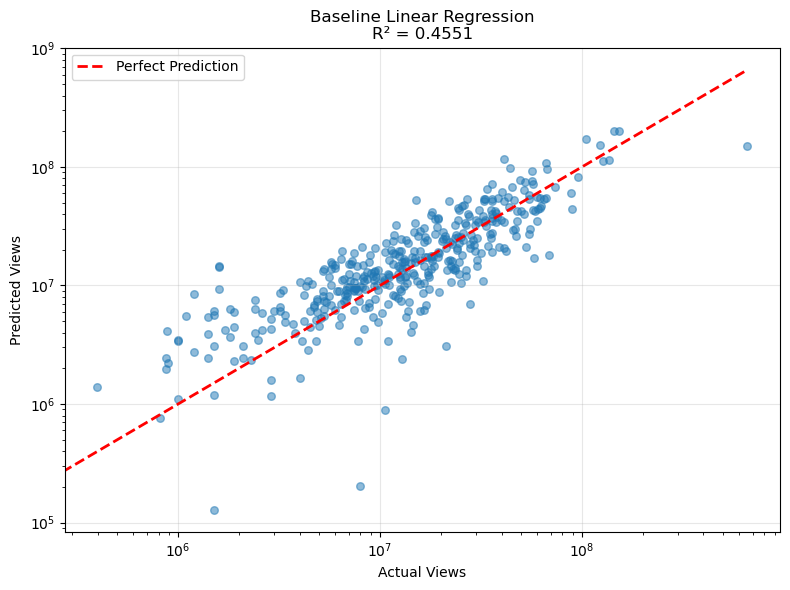


Note: Baseline model explains 45.5% of variance. See Optimized_Linear_Regression.ipynb for improvements.


In [22]:
# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, alpha=0.5, s=30)
max_val = max(max(y_test), max(preds))
min_val = min(min(y_test), min(preds))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title(f'Baseline Linear Regression\nR² = {r2:.4f}')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nNote: Baseline model explains {r2*100:.1f}% of variance. See Optimized_Linear_Regression.ipynb for improvements.")

In [23]:
# Next steps:

In [25]:
# 1) Improve Linear Regression (see Optimized_Linear_Regression.ipynb)
#    - Log transform target
#    - Feature scaling
#    - Better evaluation metrics

# 2) Use powerful models (see Random_Forest_Regressor.ipynb, XG BOOST.ipynb)
#    - Random Forest
#    - XGBoost
